# ML Classifier Copies (v0)

In [1]:
import sys
sys.path.append("../")
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, accuracy_score
from sklearn.datasets import make_blobs, make_moons

from presc.dataset import Dataset
from presc.copies.sampling import grid_sampling, uniform_sampling, normal_sampling

## Original datasets
### Blobs

(-2.5, 3.5)

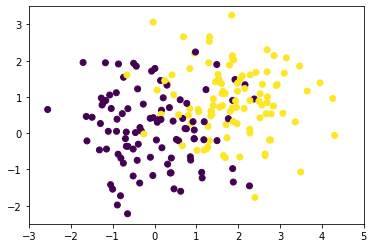

In [2]:
Xb, yb = make_blobs(n_samples=200, centers=[(0,0), (2,1)], n_features=2, random_state=0)
df_blobs = pd.DataFrame(np.column_stack((Xb, yb)), columns=["x0", "x1", "y"])
dataset_blobs = Dataset(df_blobs, label_col="y")
plt.scatter(Xb[:,0],Xb[:,1], c=yb)
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)

### Moons

(-2.5, 3.5)

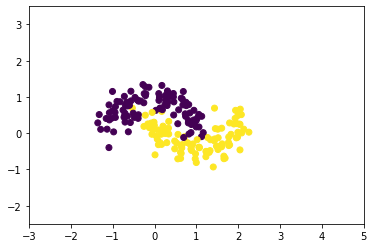

In [3]:
Xm, ym = make_moons(n_samples=200, noise=0.2, random_state=0)
df_moons = pd.DataFrame(np.column_stack((Xb, yb)), columns=["x0", "x1", "y"])
dataset_moons = Dataset(df_moons, label_col="y")
plt.scatter(Xm[:,0],Xm[:,1], c=ym)
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)

## Fit classifiers
### Blobs


Score of trained SVC classifier: 0.8

Classification report: 

               precision    recall  f1-score   support

         0.0       0.75      0.83      0.79        18
         1.0       0.85      0.77      0.81        22

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40



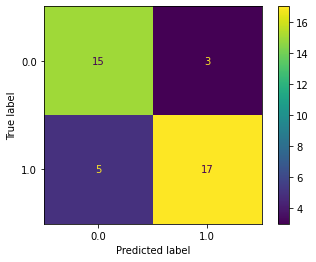

In [57]:
# Train/test split
X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs = train_test_split(dataset_blobs.features, 
                                                                            dataset_blobs.labels, test_size=0.20, random_state=0)

# SVC classifier
classifier_blobs = SVC(kernel='linear', decision_function_shape='ovo')
classifier_blobs.fit(X_train_blobs, y_train_blobs)
y_predicted_blobs = classifier_blobs.predict(X_test_blobs)

score = classifier_blobs.score(X_test_blobs, y_test_blobs)
print(f"\nScore of trained SVC classifier: {score}")
plot_confusion_matrix(classifier_blobs, X_test_blobs, y_test_blobs)
print(f"\nClassification report: \n\n", classification_report(y_test_blobs, y_predicted_blobs))

### Moons


Score of trained SVC classifier: 0.8

Classification report: 

               precision    recall  f1-score   support

         0.0       0.75      0.83      0.79        18
         1.0       0.85      0.77      0.81        22

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40



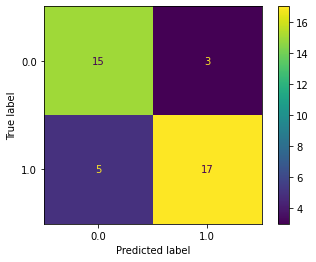

In [58]:
# Train/test split
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(dataset_moons.features, 
                                                                            dataset_moons.labels, 
                                                                            test_size=0.20, random_state=0)

# SVC classifier
classifier_moons = SVC(kernel='linear', decision_function_shape='ovo')
classifier_moons.fit(X_train_moons, y_train_moons)
y_predicted_moons = classifier_moons.predict(X_test_moons)

score = classifier_moons.score(X_test_moons, y_test_moons)
print(f"\nScore of trained SVC classifier: {score}")
plot_confusion_matrix(classifier_moons, X_test_moons, y_test_moons)
print(f"\nClassification report: \n\n", classification_report(y_test_moons, y_predicted_moons))

## Feature dynamical ranges

In [6]:
print("Blobs dataset:")
print(f"X min: {Xb[:,0].min():.4f}   X max: {Xb[:,0].max():.4f}    Interval: {Xb[:,0].max()- Xb[:,0].min():.4f}")
print(f"Y min: {Xb[:,1].min():.4f}   Y max: {Xb[:,1].max():.4f}    Interval: {Xb[:,1].max()- Xb[:,1].min():.4f}")

print("\nMoons dataset:")
print(f"X min: {Xm[:,0].min():.4f}   X max: {Xm[:,0].max():.4f}    Interval: {Xm[:,0].max()- Xm[:,0].min():.4f}")
print(f"Y min: {Xm[:,1].min():.4f}   Y max: {Xm[:,1].max():.4f}    Interval: {Xm[:,1].max()- Xm[:,1].min():.4f}")

Blobs dataset:
X min: -2.5530   X max: 4.3039    Interval: 6.8569
Y min: -2.2234   Y max: 3.2567    Interval: 5.4801

Moons dataset:
X min: -1.3546   X max: 2.2554    Interval: 3.6100
Y min: -0.9321   Y max: 1.3416    Interval: 2.2737


## Generate distribution
###  Grid-like uniform 

In [7]:
# Blobs dataset
X_generated_gb = grid_sampling(classifier_blobs, nsamples=100, 
                               feature_parameters={"x0": (Xb[:,0].min(),Xb[:,0].max()), 
                                                   "x1": (Xb[:,1].min(),Xb[:,1].max())}, label_col="y")
# Moons dataset
X_generated_gm = grid_sampling(classifier_moons, nsamples=100, 
                               feature_parameters={"x0": (Xm[:,0].min(),Xm[:,0].max()), 
                                                   "x1": (Xm[:,1].min(),Xm[:,1].max())}, label_col="y")

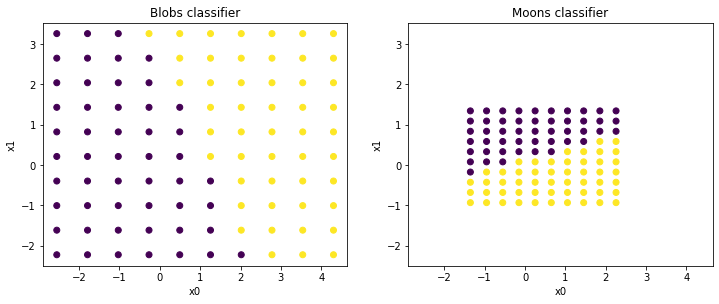

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True, sharey=True)

axs[0].scatter(X_generated_gb.df["x0"], X_generated_gb.df["x1"], c=X_generated_gb.labels)
axs[0].set_aspect("equal")
axs[0].set(xlabel="x0", ylabel="x1", title="Blobs classifier")

axs[1].scatter(X_generated_gm.df["x0"], X_generated_gm.df["x1"], c=X_generated_gm.labels)
axs[1].set_aspect("equal")
axs[1].set(xlabel="x0", ylabel="x1", title="Moons classifier")
axs[1].yaxis.set_tick_params(labelbottom=True)

plt.show()

### Random uniform
We generate 2 sets of uniform random data because the dynamic range of the features is different in each case.

In [9]:
# Blobs dataset
X_generated_ub = uniform_sampling(classifier_blobs, nsamples=100, 
                                  feature_parameters={"x0": (Xb[:,0].min(),Xb[:,0].max()), 
                                                      "x1": (Xb[:,1].min(),Xb[:,1].max())}, label_col="y")
# Moons dataset
X_generated_um = uniform_sampling(classifier_moons, nsamples=100, 
                                  feature_parameters={"x0": (Xm[:,0].min(),Xm[:,0].max()), 
                                                      "x1": (Xm[:,1].min(),Xm[:,1].max())}, label_col="y")

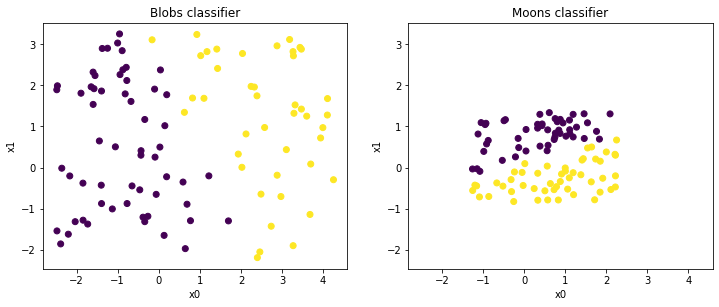

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True, sharey=True)

axs[0].scatter(X_generated_ub.df["x0"], X_generated_ub.df["x1"], c=X_generated_ub.labels)
axs[0].set_aspect("equal")
axs[0].set(xlabel="x0", ylabel="x1", title="Blobs classifier")

axs[1].scatter(X_generated_um.df["x0"], X_generated_um.df["x1"], c=X_generated_um.labels)
axs[1].set_aspect("equal")
axs[1].set(xlabel="x0", ylabel="x1", title="Moons classifier")
axs[1].yaxis.set_tick_params(labelbottom=True)

plt.show()

### Normal distribution

In [13]:
# Blobs dataset
mu_blobs = [Xb[:,0].min()+((Xb[:,0].max()-Xb[:,0].min())/2), Xb[:,1].min()+((Xb[:,1].max()-Xb[:,1].min())/2)]
X_generated_nb = normal_sampling(classifier_blobs, nsamples=100, 
                                 feature_parameters={"x0": (mu_blobs[0], 2), "x1": (mu_blobs[1], 2)}, 
                                 label_col="y")
# Moons dataset
mu_moons = [Xm[:,0].min()+((Xm[:,0].max()-Xm[:,0].min())/2), Xm[:,1].min()+((Xm[:,1].max()-Xm[:,1].min())/2)]
X_generated_nm = normal_sampling(classifier_moons, nsamples=100, 
                                 feature_parameters={"x0": (mu_moons[0], 1), "x1": (mu_moons[1], 1)}, 
                                 label_col="y")

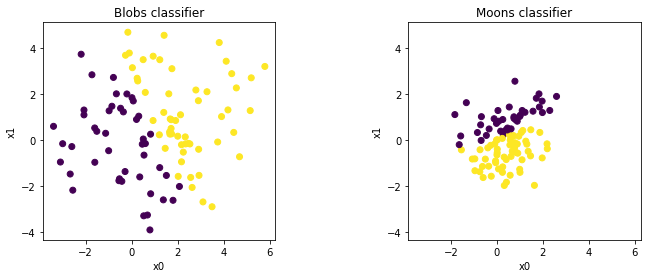

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharex=True, sharey=True)

axs[0].scatter(X_generated_nb.df["x0"], X_generated_nb.df["x1"], c=X_generated_nb.labels)
axs[0].set_aspect("equal")
axs[0].set(xlabel="x0", ylabel="x1", title="Blobs classifier")

axs[1].scatter(X_generated_nm.df["x0"], X_generated_nm.df["x1"], c=X_generated_nm.labels)
axs[1].set_aspect("equal")
axs[1].set(xlabel="x0", ylabel="x1", title="Moons classifier")
axs[1].yaxis.set_tick_params(labelbottom=True)

plt.show()

----

## Copy classifier with synthetic data

### Blobs SVC classifier + grid-like synthetic data

In [16]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_gb.features, 
                                                                    X_generated_gb.labels, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_blobs)

#### Classification of synthetic data

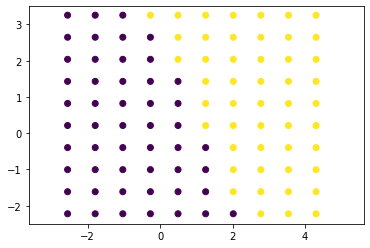

In [17]:
plt.scatter(X_generated_gb.features["x0"], X_generated_gb.features["x1"], c=X_generated_gb.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 1.00

Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



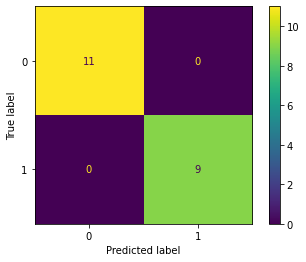

In [18]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.80

Classification report: 

               precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.85      0.77      0.81        22

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40



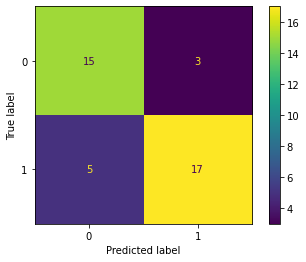

In [19]:
score_copy = classifier_copy.score(X_test_blobs, y_test_blobs)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_blobs, y_test_blobs)
print(f"\nClassification report: \n\n", classification_report(y_test_blobs, y_predicted))

#### Empirical fidelity error

In [20]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_blobs, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0000
Original dataset:  0.0000


----
### Blobs SVC classifier + random uniform synthetic data

In [21]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_ub.features, 
                                                                    X_generated_ub.labels, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_blobs)

#### Classification of synthetic data

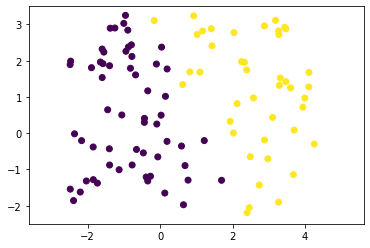

In [22]:
plt.scatter(X_generated_ub.features["x0"], X_generated_ub.features["x1"], c=X_generated_ub.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 1.00

Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



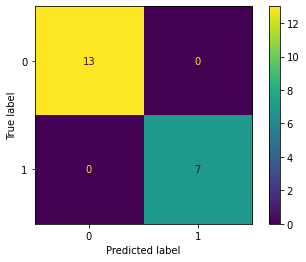

In [23]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.82

Classification report: 

               precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.86      0.82      0.84        22

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40



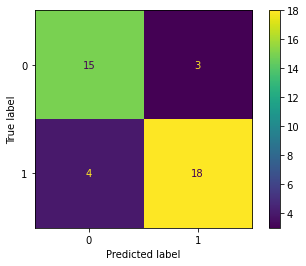

In [24]:
score_copy = classifier_copy.score(X_test_blobs, y_test_blobs)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_blobs, y_test_blobs)
print(f"\nClassification report: \n\n", classification_report(y_test_blobs, y_predicted))

#### Empirical fidelity error

In [25]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_blobs, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0000
Original dataset:  0.0250


-----
### Blobs SVC classifier + normally distributed synthetic data

In [26]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_nb.features, 
                                                                    X_generated_nb.labels, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_blobs)

#### Classification of synthetic data

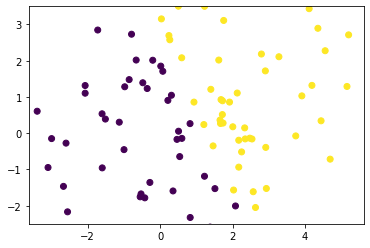

In [27]:
plt.scatter(X_generated_nb.features["x0"], X_generated_nb.features["x1"], c=X_generated_nb.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 1.00

Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



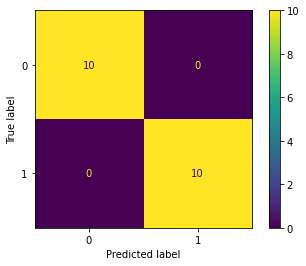

In [28]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.82

Classification report: 

               precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.86      0.82      0.84        22

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40



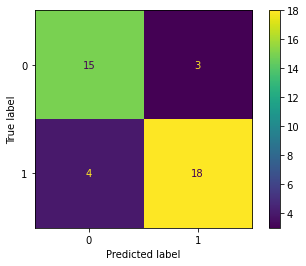

In [29]:
score_copy = classifier_copy.score(X_test_blobs, y_test_blobs)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_blobs, y_test_blobs)
print(f"\nClassification report: \n\n", classification_report(y_test_blobs, y_predicted))

#### Empirical fidelity error

In [30]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_blobs, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0000
Original dataset:  0.0250


-----
### Moons SVC classifier + grid-like synthetic data

In [31]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_gm.features, 
                                                                    X_generated_gm.labels, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_moons)

#### Classification of synthetic data

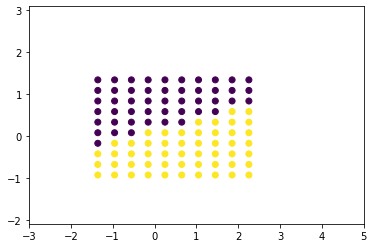

In [32]:
plt.scatter(X_generated_gm.features["x0"], X_generated_gm.features["x1"], c=X_generated_gm.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 0.95

Classification report: 

               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.92      0.96        13

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



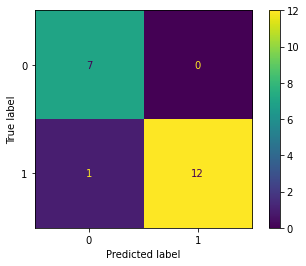

In [33]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.80

Classification report: 

               precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.81      0.72      0.76        18

    accuracy                           0.80        40
   macro avg       0.80      0.79      0.80        40
weighted avg       0.80      0.80      0.80        40



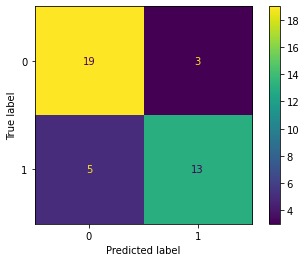

In [34]:
score_copy = classifier_copy.score(X_test_moons, y_test_moons)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_moons, y_test_moons)
print(f"\nClassification report: \n\n", classification_report(y_test_moons, y_predicted))

#### Empirical fidelity error

In [35]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_moons, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0500
Original dataset:  0.0500


-----
### Moons SVC classifier + random uniform synthetic data

In [36]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_um.features, 
                                                                    X_generated_um.labels, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_moons)

#### Classification of synthetic data

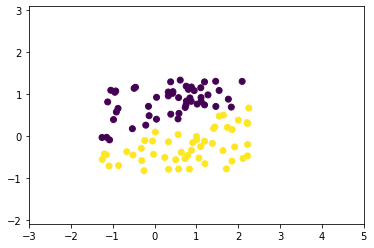

In [37]:
plt.scatter(X_generated_um.features["x0"], X_generated_um.features["x1"], c=X_generated_um.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 0.95

Classification report: 

               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



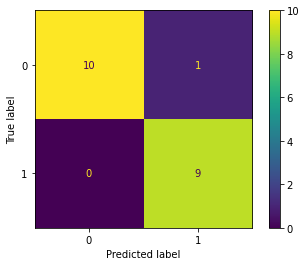

In [38]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.85

Classification report: 

               precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.83      0.83      0.83        18

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



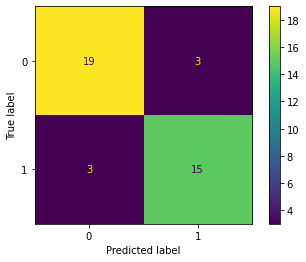

In [39]:
score_copy = classifier_copy.score(X_test_moons, y_test_moons)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_moons, y_test_moons)
print(f"\nClassification report: \n\n", classification_report(y_test_moons, y_predicted))

#### Empirical fidelity error

In [40]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_moons, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0500
Original dataset:  0.0000


-----
### Moons SVC classifier + normally distributed synthetic data

In [41]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_nm.features, 
                                                                    X_generated_nm.labels, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_moons)

#### Classification of synthetic data

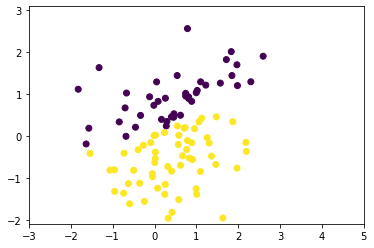

In [42]:
plt.scatter(X_generated_nm.features["x0"], X_generated_nm.features["x1"], c=X_generated_nm.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 0.95

Classification report: 

               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



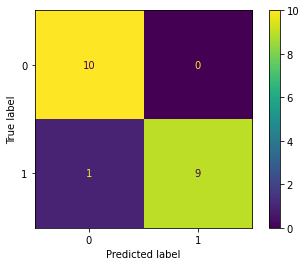

In [43]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.82

Classification report: 

               precision    recall  f1-score   support

           0       0.86      0.82      0.84        22
           1       0.79      0.83      0.81        18

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40



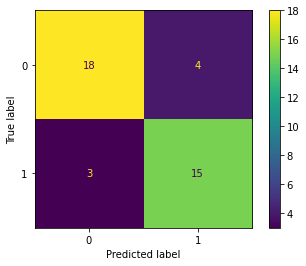

In [44]:
score_copy = classifier_copy.score(X_test_moons, y_test_moons)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_moons, y_test_moons)
print(f"\nClassification report: \n\n", classification_report(y_test_moons, y_predicted))

#### Empirical fidelity error

In [45]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_moons, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0500
Original dataset:  0.0250


--------